In [1]:
# Importing libraries
# numpy - supports large, multi-dimensional arrays along with high-level mathematical functions to operate on these arrays
# datetime - manipulating the date and time
# pandas - working with data sets: analyzing (data analysis of relational & labeled data), cleaning, exploring and manipulating data
# matplotlib - for creating static, animated and interactive visualizations
# yfinance - provides access to the Yahoo Finance API allowing the application download historical data via stock symbols
 
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yfin


In [3]:
# I picked a big data frame for accuracy of prediction. Remember LSTM is very accurate with long trem dependencies unlike ARIMA & FaceBook Prophet
# Default stocks are Apple Inc. its ticker is AAPL
# df.head() - gives us data  on early 2011

start = dt.date(2011,1,1)
end = dt.date(2020,12,31)
ticker = 'AAPL'

df = yfin.download(ticker, start, end)
df.head() 

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,11.630000,11.795000,11.601429,11.770357,10.017968,445138400
2011-01-04,11.872857,11.875000,11.719643,11.831786,10.070251,309080800
2011-01-05,11.769643,11.940714,11.767857,11.928571,10.152623,255519600
2011-01-06,11.954286,11.973214,11.889286,11.918929,10.144421,300428800
2011-01-07,11.928214,12.012500,11.853571,12.004286,10.217067,311931200


In [4]:
# df.tail() - gives us data on late 2020

df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-23,132.160004,132.429993,130.779999,130.960007,129.209305,88223700
2020-12-24,131.320007,133.460007,131.100006,131.970001,130.205750,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,134.862671,124486200
2020-12-29,138.050003,138.789993,134.339996,134.869995,133.067017,121047300
2020-12-30,135.580002,135.990005,133.399994,133.720001,131.932373,96452100


In [5]:
## Allows one to reset the index back to the default 0, 1, 2. Making the date index a column

df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,11.630000,11.795000,11.601429,11.770357,10.017968,445138400
1,2011-01-04,11.872857,11.875000,11.719643,11.831786,10.070251,309080800
2,2011-01-05,11.769643,11.940714,11.767857,11.928571,10.152623,255519600
3,2011-01-06,11.954286,11.973214,11.889286,11.918929,10.144421,300428800
4,2011-01-07,11.928214,12.012500,11.853571,12.004286,10.217067,311931200


In [6]:
## Hence I can drop the Date & Adj Close column
## axis = 1 points to the column, 0 normally points to row
## The web app is based on the Close column

df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,11.630000,11.795000,11.601429,11.770357,445138400
1,11.872857,11.875000,11.719643,11.831786,309080800
2,11.769643,11.940714,11.767857,11.928571,255519600
3,11.954286,11.973214,11.889286,11.918929,300428800
4,11.928214,12.012500,11.853571,12.004286,311931200


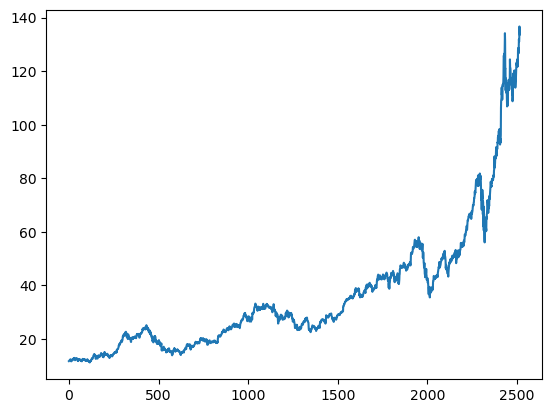

In [7]:
## Plotting the Close column

plt.plot(df.Close)

In [8]:
## Displaying the data frame

df

,Open,High,Low,Close,Volume
0,11.630000,11.795000,11.601429,11.770357,445138400
1,11.872857,11.875000,11.719643,11.831786,309080800
2,11.769643,11.940714,11.767857,11.928571,255519600
3,11.954286,11.973214,11.889286,11.918929,300428800
4,11.928214,12.012500,11.853571,12.004286,311931200
...,...,...,...,...,...
2511,132.160004,132.429993,130.779999,130.960007,88223700
2512,131.320007,133.460007,131.100006,131.970001,54930100
2513,133.990005,137.339996,133.509995,136.690002,124486200
2514,138.050003,138.789993,134.339996,134.869995,121047300


In [9]:
## Starts calculating the moving average from the 101 index

ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2511    118.000475
2512    118.223525
2513    118.489800
2514    118.699475
2515    118.925550
Name: Close, Length: 2516, dtype: float64

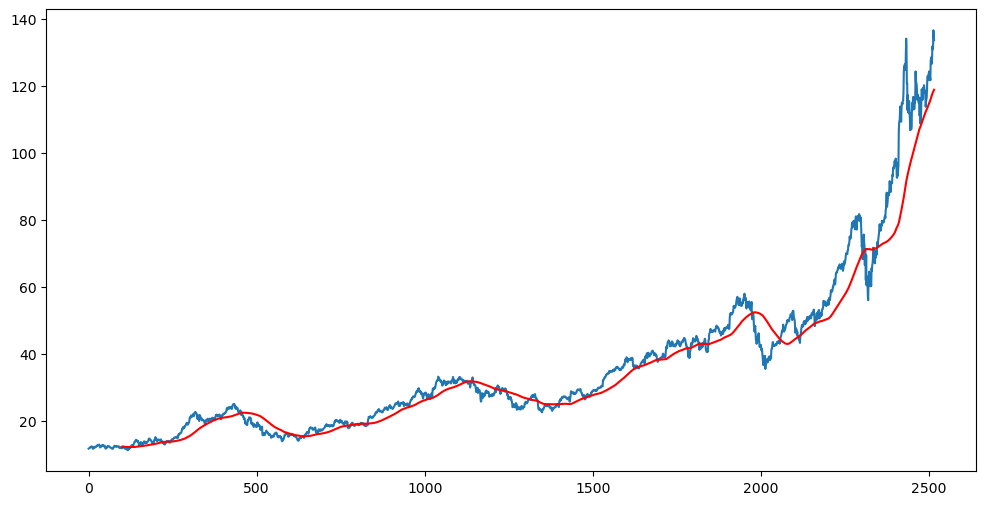

In [10]:
## Plotting the graph of 100MA

plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [11]:
## Plotting the graph of 200MA

ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2511     98.809175
2512     99.158737
2513     99.494725
2514     99.866312
2515    100.218837
Name: Close, Length: 2516, dtype: float64

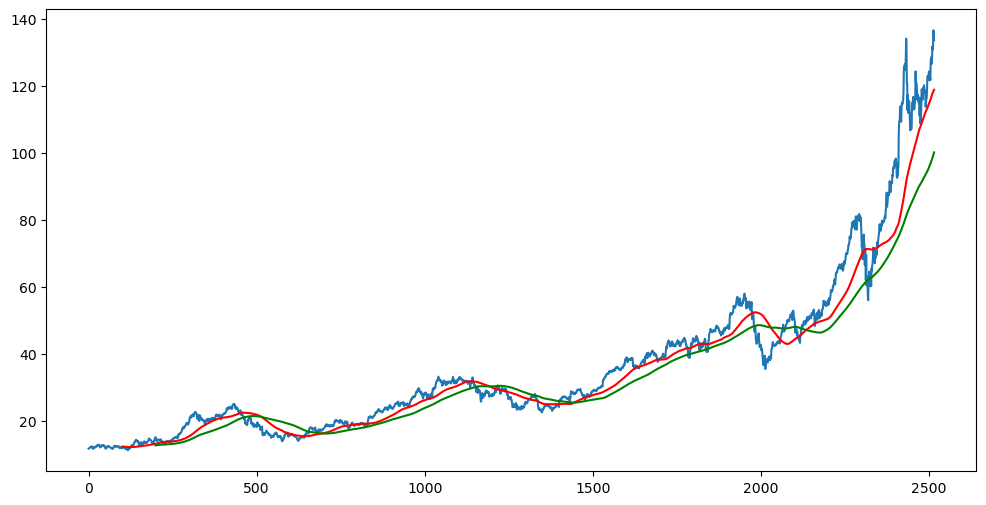

In [12]:
## Plotting both the 100MA & 200MA

plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [13]:
## Returns the number of rows & columns in a DataFrame respectively

df.shape

(2516, 5)

In [14]:
# Splitting Data into Training and Testing

## 1st line = Selects the 1st 70% of the rows using indexing based on the length of 'Close' df
## 2nd line = Selects the last 30% of the rows using indexing based on the length of 'Close' df

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)]) # 70% data - from 0 to 70
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))]) # 30% - from 70 to 100

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(755, 1)


In [15]:
# From 0% - 69% of data

data_training.head()

,Close
0,11.770357
1,11.831786
2,11.928571
3,11.918929
4,12.004286


In [16]:
## From 70% - 99% of data

data_testing.head()

,Close
1761,43.064999
1762,43.057499
1763,43.257500
1764,43.750000
1765,43.587502


In [17]:
## ML Scaling is part of data preparation as this technique brings data points that are far from each other closer in order to increase the algorithm effectiveness and speed up the ML processing
## MinMaxScaler is a data preprocessing technique that scales and normalizes data in a given range. 
## feature_range parameter specifies the range to which the data should be scaled. In this case, it is set to (0,1) which means that the data will be scaled to the range of 0 to 1.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
## Transforms and scales the input data data_training 
## Using the MinMaxScaler object scaler, it stores the resulting scaled data in a new variable data_training_array.

data_training_array = scaler.fit_transform(data_training)
data_training_array


array([[0.01549552],
       [0.01736587],
       [0.02031271],
       ...,
       [0.95569915],
       [0.9593528 ],
       [0.94527085]])

In [19]:
## Returns the rows and columns of the trained data respectively

data_training_array.shape

(1761, 1)

In [20]:
## This is the sliding window approach where the use of prior time steps is used to predict the next time step
## x_train & y_train init two empty lists to store the sliding window inputs and corresponding outputs for the model
## The for loop iterates over the range of time steps from 100 to the total number of time steps in the training data data_training_array.shape[0]
## This range of values is chosen because the sliding window approach is used to generate training data, where the input features for a given time step are based on the past 100 time steps.
## x_train.append(data_training_array[i-100: i]) adds the past 100 time steps as input features to the x_train list.
## The corresponding output for each training example is the value of the first feature (column 0) at the current time step i. 
## The code y_train.append(data_training_array[i, 0]) adds the output value to the y_train list
## After the loop completes, x_train and y_train are converted to NumPy arrays using the np.array() method to create the final training data for the time series prediction model

x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
x_train.shape

(1661, 100, 1)

In [22]:
# ML Model

In [23]:
## Sequential - a class that represents a linear stack of neural network layers in Keras.It is used to define a model layer-by-layer in a simple and intuitive way
## Dense - a class that represents a fully connected neural network layer in Keras. It is used to create a dense neural network layer where each neuron is connected to every neuron in the previous layer.
## Dropout - a class that represents a regularization technique in Keras. It can be used to randomly drop out (set to zero) a fraction of the input units to the layer during training, which can help prevent overfitting.
## LSTM -  is a class that represents an LSTM layer in Keras. It is used to create a layer of LSTM cells that can remember information for a long time and make predictions based on that information.
## Overfitting happens when a model learns the noise and detail of the data (trains too well) to the extent that it negatively impacts the performance of the data
## Here I simply import the classes from Keras to define and train an LSTM neural network model for a sequence prediction task.

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [24]:
## Sequential() method creates a new empty sequential model object.
## Model.add() method is then used to add different layers to the model.
## Units = 'value', for optimality I chose a number of units being that the size of input data is a large & the problem is complex
## to avoid overfitting i started with a small number of units and gradually increased the performance.
## the multiple no of units improves LSTM's ability to learn complex relationships in seq data, while reducing the risk of overfitting
## Activation = 'relu', activation functions are used to introduce non linear relationships btwn input & output of a network layer
## it simply outputs the input value if it is +ve and 0 if it is -ve. This helps the net learn the abstract reps of data by introducing non linearity
## Dropout(value) adds a dropout layer at a given rate for regularization
## Dense(units = 1) adds a fully connected dense layer to the model with 1 output unit. This layer will produce the final prediction output of the model
## it adds a set of weights and biases to produce a single output value for each times step. It also introduces non-linearity through activation functions
## the value is 1 is because this is a regression problem and its a scalar value


model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
            input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))



model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))



model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))



model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))



model.add(Dense(units = 1))


In [25]:
## Layer (type) - The type of layer and its name, followed by the layer's output shape in parentheses.
## Output Shape - The shape of the output tensor of the layer, helps to check the shape of each layer's output to ensure that it is compatible with the input of the next layer.
## Param - The number of trainable parameters in the layer. This includes the weights and biases of the layer.
## model.summary() - Is useful for verifying that the model is constructed correctly

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [26]:
## model.compile() is a method that is used to configure the learning process of the model
## model.fit() is used to train the model on a given dataset
## The optimizer is the algorithm that will be used to update the weights in the model during training. The 'adam' optimizer is a popular choice because it adapts the learning rate during training and is generally efficient. 
## The loss function is a measure of how well the model is performing on the training data. The mean squared error (MSE) is a common choice for regression problems, as it measures the average squared difference between the predicted values and the true values
## epochs refers to one full pass through the training data during the training process. It will process the training data 50 times
## if epochs are too low the model will not have enough time to learn the underlying patterns
## if epochs are too high the model will start to overfit

model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 [==============================] - 74s 476ms/step - loss: 0.0421
Epoch 2/50
52/52 [==============================] - 25s 478ms/step - loss: 0.0104
Epoch 3/50
52/52 [==============================] - 31s 601ms/step - loss: 0.0076
Epoch 4/50
52/52 [==============================] - 30s 582ms/step - loss: 0.0069
Epoch 5/50
52/52 [==============================] - 29s 559ms/step - loss: 0.0062
Epoch 6/50
52/52 [==============================] - 28s 541ms/step - loss: 0.0053
Epoch 7/50
52/52 [==============================] - 26s 502ms/step - loss: 0.0068
Epoch 8/50
52/52 [==============================] - 26s 497ms/step - loss: 0.0074
Epoch 9/50
52/52 [==============================] - 29s 550ms/step - loss: 0.0057
Epoch 10/50
52/52 [==============================] - 34s 655ms/step - loss: 0.0058
Epoch 11/50
52/52 [==============================] - 28s 540ms/step - loss: 0.0052
Epoch 12/50
52/52 [==============================] - 27s 517ms/step - loss: 0.0055
Epoch 13/50
5

In [27]:
## model.save() is a method that is used to save the trained model to disk. 
## The argument to this method is the file path where the model will be saved, along with the file extension .h5, which stands for Hierarchical Data Format version 5.
## Saving the model is useful because it allows you to reuse the model later, without having to retrain it from scratch. 
## This can save time and resources, especially for larger models that may take a long time to train.

model.save('keras_model.h5')

In [27]:
data_testing.head()

,Close
1761,43.064999
1762,43.057499
1763,43.257500
1764,43.750000
1765,43.587502


In [28]:
data_training.tail(100)

,Close
1661,40.264999
1662,38.830002
1663,39.369999
1664,39.962502
1665,40.400002
...,...
1756,43.752499
1757,42.642502
1758,42.650002
1759,42.770000


In [29]:
## selects the most recent 100 days of historical data from data_training and assigns it to a new data frame called past_100_days.

past_100_days = data_training.tail(100)

In [30]:
## appends the data_testing data frame to past_100_days to create a final data frame final_df. 
## The parameter ignore_index=True ensures that the index of the appended rows are not retained from data_testing, but rather re-indexed in a continuous sequence starting from zero.
## final_df = past_100_days.append(data_testing, ignore_index=True) -> this will be deprecated soon

final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [31]:
final_df.head()

,Close
0,40.264999
1,38.830002
2,39.369999
3,39.962502
4,40.400002


In [32]:
## scaler is an instance of the MinMaxScaler class from the sklearn.preprocessing module that was previously imported.
## final_df is a data frame that contains both the historical and test data that has been preprocessed and appended together. scaler.fit_transform() method is then called with final_df as an argument to scale the data between the feature range of (0,1) using the minimum and maximum values of the data.

input_data = scaler.fit_transform(final_df)
input_data

array([[0.0466421 ],
       [0.03245422],
       [0.0377932 ],
       [0.04365129],
       [0.04797687],
       [0.04637021],
       [0.03873248],
       [0.03784264],
       [0.03712585],
       [0.04347825],
       [0.0439726 ],
       [0.04221767],
       [0.043676  ],
       [0.04765553],
       [0.05121487],
       [0.05230245],
       [0.05390908],
       [0.05403268],
       [0.04916331],
       [0.04874311],
       [0.04713645],
       [0.04063574],
       [0.04772968],
       [0.04614776],
       [0.04315691],
       [0.03977061],
       [0.04372544],
       [0.0407346 ],
       [0.0408829 ],
       [0.03430804],
       [0.02768371],
       [0.02397607],
       [0.02066392],
       [0.02706577],
       [0.02975997],
       [0.02741181],
       [0.02948808],
       [0.02872184],
       [0.03037791],
       [0.02790615],
       [0.03262723],
       [0.03240478],
       [0.03373951],
       [0.03388781],
       [0.03549448],
       [0.034135  ],
       [0.03658206],
       [0.043

In [33]:
input_data.shape

(855, 1)

In [34]:

## The for loop iterates over the input_data array, starting from index 100, which corresponds to the first row of input_data that contains both historical and test data. 
## The loop then selects a sliding window of 100 consecutive rows from input_data, with each window shifted by one row from the previous window. The first 100 rows are skipped because they are used as input data for the LSTM model during training.
## x_test contains input features for the test set while y_test containing the corresponding target outputs.
## x_test will contain the input sequences (i.e., the sliding windows of 100 rows) and y_test will contain the corresponding output values that the model is expected to predict.

x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [35]:
## np.array() is a function from the NumPy library that converts Python lists into NumPy arrays. 

x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [36]:
# Making Predictions

## This is a method of the model object that generates predictions for the given input data.
## it takes x_test as input and returns an array of predicted output values.
## y_test and y_predicted is that y_test contains the actual values of the stock price
## y_predicted contains the values predicted by the LSTM model. In other words, y_test represents the ground truth or the actual data, while y_predicted represents the predictions made by the model.

y_predicted = model.predict(x_test)

24/24 [==============================] - 9s 194ms/step


In [37]:
y_predicted.shape

(755, 1)

In [38]:
y_test

array([0.07432581, 0.07425166, 0.07622907, 0.08109844, 0.07949181,
       0.07944237, 0.07934348, 0.08179053, 0.08626441, 0.08403984,
       0.09123267, 0.09162813, 0.08965075, 0.08604196, 0.08614082,
       0.07917047, 0.0714833 , 0.07247199, 0.06369727, 0.06125021,
       0.0623872 , 0.06325233, 0.04525792, 0.03534618, 0.05151147,
       0.04288502, 0.03203399, 0.03514843, 0.05072053, 0.05474947,
       0.0622389 , 0.07613022, 0.074746  , 0.07331241, 0.07138444,
       0.07491904, 0.08233432, 0.09091133, 0.08947771, 0.08881032,
       0.08109844, 0.08408929, 0.08559706, 0.08522628, 0.08117259,
       0.08589366, 0.0934078 , 0.09770867, 0.09338309, 0.0896013 ,
       0.09012035, 0.08856317, 0.08183998, 0.08169168, 0.07187879,
       0.06589713, 0.05623254, 0.07558643, 0.06463651, 0.06003904,
       0.06325233, 0.06053338, 0.06476011, 0.07271918, 0.07566058,
       0.0647354 , 0.06886324, 0.07677286, 0.07477074, 0.07897273,
       0.08043106, 0.0831253 , 0.08910696, 0.08811823, 0.07566

In [39]:
y_predicted

array([[0.15242998],
       [0.15227267],
       [0.15202215],
       [0.15176708],
       [0.1516045 ],
       [0.15157226],
       [0.15166938],
       [0.15187463],
       [0.15217978],
       [0.1526087 ],
       [0.15314688],
       [0.1538265 ],
       [0.15466079],
       [0.15561365],
       [0.15660259],
       [0.15755546],
       [0.15834993],
       [0.15883309],
       [0.15893725],
       [0.15859687],
       [0.15779875],
       [0.15661147],
       [0.15515654],
       [0.15341204],
       [0.15131107],
       [0.1490009 ],
       [0.1465877 ],
       [0.14408183],
       [0.14153972],
       [0.13918133],
       [0.13719179],
       [0.1357086 ],
       [0.13487968],
       [0.13473366],
       [0.13518938],
       [0.13610554],
       [0.13736042],
       [0.13889974],
       [0.14073119],
       [0.14281668],
       [0.1450729 ],
       [0.14734377],
       [0.14951275],
       [0.15151232],
       [0.1532976 ],
       [0.15480193],
       [0.15603107],
       [0.157

In [40]:
## scaler.scale_ is an attribute of the MinMaxScaler object that contains the scaling factor used to transform the input data.

scaler.scale_

array([0.00988704])

In [41]:
## scale_factor variable is defined as the reciprocal of the scaling factor stored in scaler.scale_. 
## This is done so that we can rescale the predicted and true output values back to their original scale.

scale_factor = 1/0.00988704
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

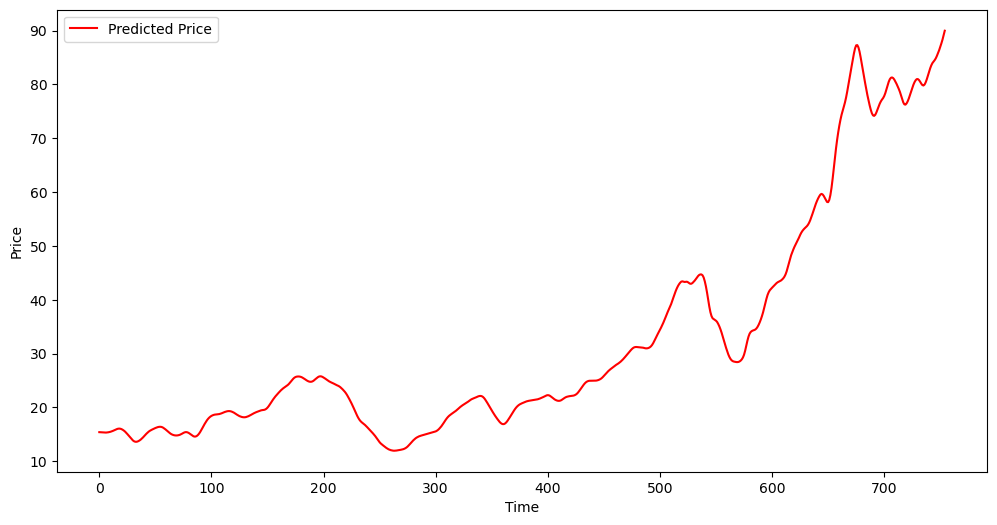

In [43]:
#Prediction Graph

plt.figure(figsize=(12,6))
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

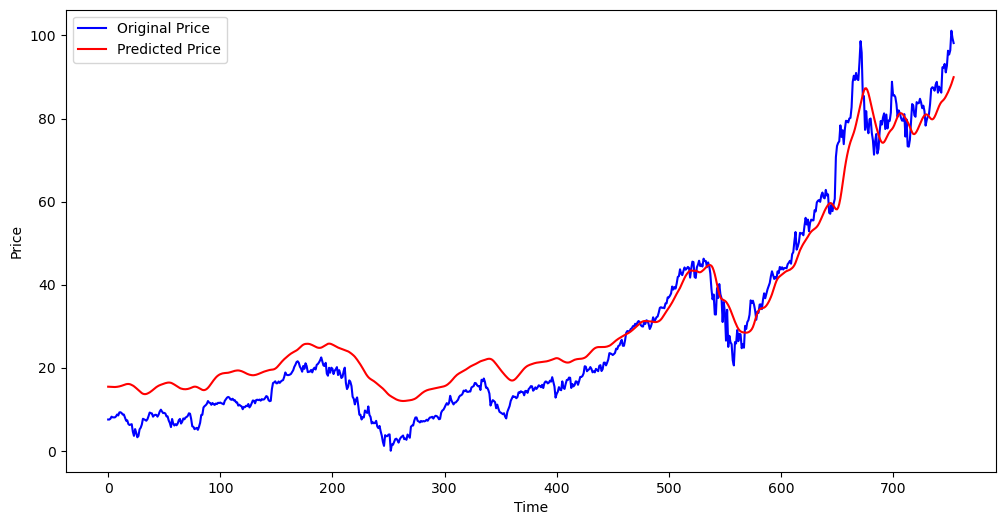

In [44]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()